### Import Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

### Read Image

In [3]:
img_path = 'car_image.jpeg'

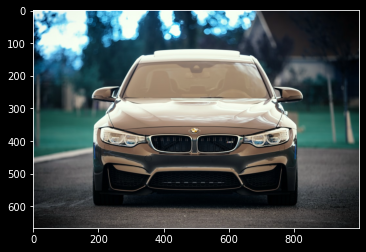

In [6]:
bgr_img = cv2.imread(img_path)
plt.imshow(bgr_img)

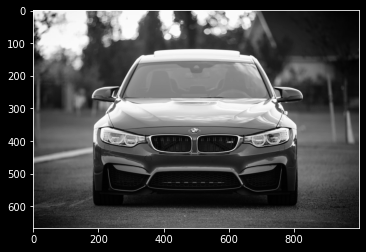

In [7]:
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
gray_img = gray_img.astype('float32') / 255
plt.imshow(gray_img, cmap='gray')
plt.show()

### Define the filters

In [8]:
import numpy as np

filter_vals = np.array([[-1, -1, 1, 1],
                        [-1, -1, 1, 1],
                        [-1, -1, 1, 1],
                        [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


### Make some various filters

In [32]:
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3

filters = np.array([filter_1, filter_2, filter_3, filter_4])

print('Filter 1: \n', filter_1)
print('Filter 2: \n', filter_2)
print('Filter 3: \n', filter_3)
print('Filter 4: \n', filter_4)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]
Filter 2: 
 [[ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]]
Filter 3: 
 [[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [ 1  1  1  1]
 [ 1  1  1  1]]
Filter 4: 
 [[ 1  1  1  1]
 [ 1  1  1  1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]]


### Visualize the filters

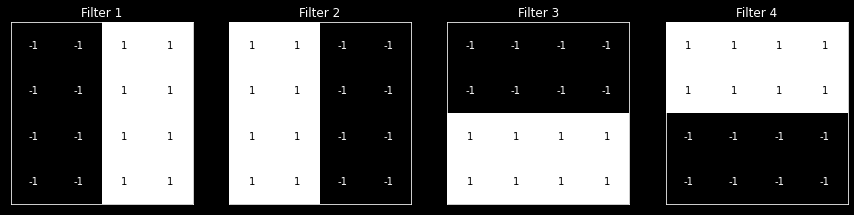

In [33]:
fig = plt.figure(figsize=(15, 15))

for i in range(4):
  ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
  ax.imshow(filters[i], cmap='gray')
  ax.set_title('Filter %s' % str(i+1))
  width, height = filters[i].shape
  for x in range(width):
    for y in range(height):
      ax.annotate(str(filters[i][x][y]), xy=(y,x),
                  horizontalalignment='center',
                  verticalalignment='center',
                  color='white' if filters[i][x][y] < 0 else 'black')

### Defining a convolutional layer

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class Network(keras.layers.Layer):

  def __init__(self, filters):
    super(Network, self).__init__()
    k_height, k_width = filters.shape[1:]
    self.conv = layers.Conv2D(4, kernel_size=(k_height, k_width), strides=(1, 1),
                             data_format='channels_last', padding='valid', use_bias=False)
    self.relu = layers.ReLU()

  def forward(self, x):
    conv_x = self.conv(x)
    activated_x = self.relu(conv_x)
      
    return conv_x, activated_x

In [40]:
model = Network(filters)
print(model)

### Visualize the output of each filter

In [41]:
def viz_layer(layer, n_filters=4):
  fig=plt.figure(figsize=(20, 20))

  for i in range (n_filters):
    ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(layer[0, :, :, i].numpy()), cmap='gray')
    ax.set_title('Output %s' % str(i+1))

### Before ReLU

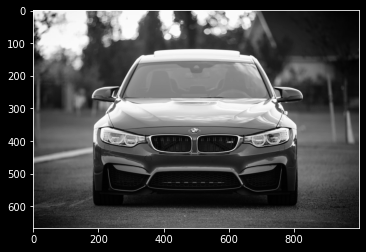

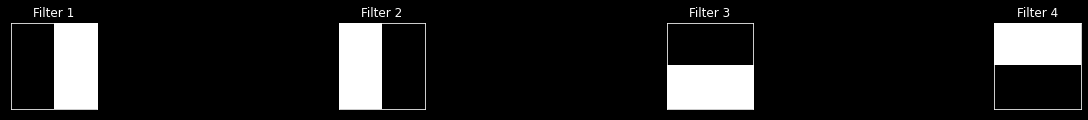

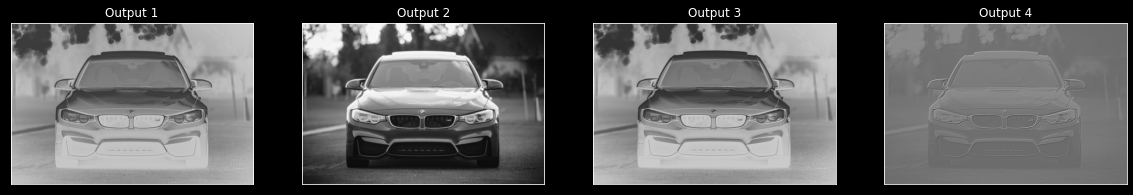

In [42]:
plt.imshow(gray_img, cmap='gray')

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)

for i in range(4):
  ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
  ax.imshow(filters[i], cmap='gray')
  ax.set_title('Filter %s' % str(i+1))

gray_img_keras = gray_img.reshape(-1, gray_img.shape[0], gray_img.shape[1], 1)

conv_layer, activated_layer = model.forward(gray_img_keras)

viz_layer(conv_layer)

### After ReLU

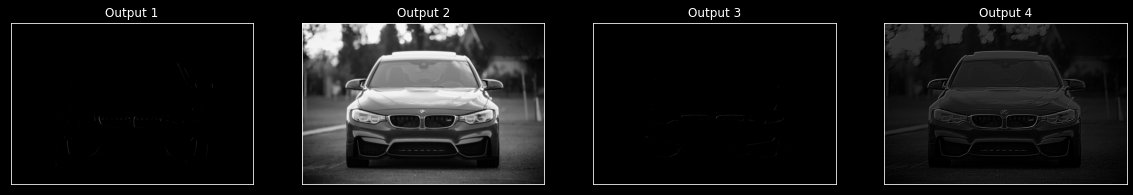

In [45]:
viz_layer(activated_layer)

### Debug for Initializing Custom Kernels

In [46]:
model = tf.keras.Sequential([
        tf.keras.Input(shape=(72, 72, 1), name='input'),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), kernel_initializer=tf.keras.initializers.zeros(),
                               activation='relu', use_bias=True)
])

model.layers[0].get_weights()[0].shape

(3, 3, 1, 32)

In [47]:
# But it doesn't work with functional model we are using

inp = layers.Input(shape=(72, 72, 1))
conv = layers.Conv2D(4, kernel_size=(4, 4), strides=(1, 1), 
                     data_format="channels_last", padding="valid", use_bias=False)

conv.get_weights()

[]

---